Human Resources Analytics (Simulated) Dataset

https://www.kaggle.com/ludobenistant/hr-analytics

In [1]:
#imports
from __future__ import print_function, division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import datatime

%matplotlib inline

In [2]:
ls ../data

HR_comma_sep.csv


Let's read in the data and see what we're working with:

In [3]:
df = pd.read_csv('../data/HR_comma_sep.csv')

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

Let's look at some of the variables to see what they mean, how they're measuring, and/or what kinds of variables they are.

In [6]:
df['left'].describe()

count    14999.000000
mean         0.238083
std          0.425924
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: left, dtype: float64

So it looks like for `left`, 1 means they left and 0 means they're still at the company.

In [7]:
df['satisfaction_level'].describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

`satisfaction_level` seems to be a value from 0.09 to 1.00 (or none of the entries gave it a 0.00 score).

In [8]:
type(df['satisfaction_level'])

pandas.core.series.Series

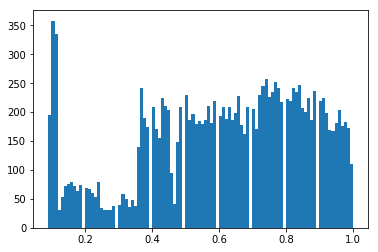

In [9]:
plt.hist(df['satisfaction_level'], bins=100);

In [10]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [11]:
df['last_evaluation'].describe()

count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64

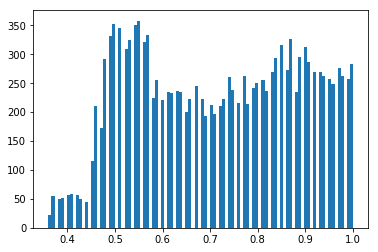

In [16]:
plt.hist(df['last_evaluation'], bins=100);

`last_evalution` seems to be another variable between 0.36 and 1.00. So I'm not sure what this means? For now, I'll take it as a just a relative amount of time.

In [13]:
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

So `sales` is the kind of department the person worked in. I'll come back to this later...

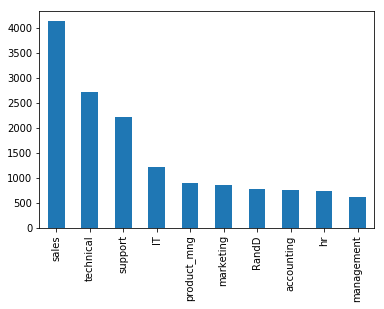

In [17]:
df['sales'].value_counts().plot(kind='bar')

In [14]:
df['number_project'].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

So `number_project` could be number of projects worked on through-out her/his time spent at the company, or the number or projects they're currently working on. I'll assume it's the former.

In [15]:
df['time_spend_company'].value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

In [42]:
tsc = df['time_spend_company'].value_counts().copy()
#tsc_zeros = pd.Series(np.zeros(2), index=[1,9]) # this changes it to float
tsc_zeros = pd.Series([0,0], index=[1,9])
tsc = tsc.append(tsc_zeros).sort_index(axis=0).copy()
tsc

1        0
2     3244
3     6443
4     2557
5     1473
6      718
7      188
8      162
9        0
10     214
dtype: int64

Perhaps `time_spend_company` means the years spent working here?

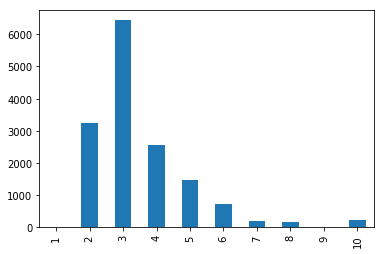

In [49]:
#plt.hist(tsc, bins=10, align='left', rwidth=0.5);
#plt.bar(tsc, rwidth=0.5);
tsc.plot.bar();

In [39]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [56]:
df['Work_accident'].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

`Work_accident` appears to be a boolean value, and I'm assuming 0 is no accident, and 1 is accident.

In [51]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

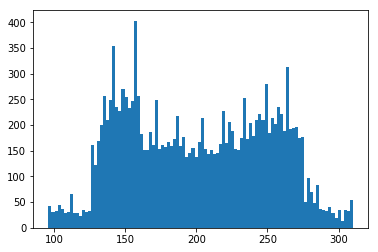

In [61]:
plt.hist(df['average_montly_hours'], bins=100);

In [62]:
df['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

Not a lot of `promotion_last_5years`, here... :(

Cleaning up/pre-processing and feature engineering...

`salary` has three categorical variables, but instead of using dummy variables, we'll just change them to numerical.

In [80]:
def impute_salary(s):
    if (s == 'low') or (s == 1):
        return 1
    if (s == 'medium') or (s == 2):
        return 2
    if (s == 'high') or (s == 3):
        return 3
    else:
        return -1
    
df['salary'] = df['salary'].apply(lambda x: impute_salary(x))
df['salary'].value_counts()

1    7316
2    6446
3    1237
Name: salary, dtype: int64

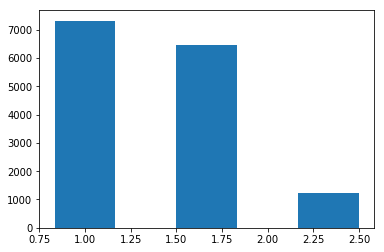

In [81]:
plt.hist(df['salary'], bins=3, align='left',rwidth=0.5);

`sales` actually is a categorical variable that seems to indicate department the person worked/s in. Let's first just change the name to something more fitting.

In [67]:
df.columns = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'dept', 'salary']

In [69]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

Now let's convert these into dummy variables:

In [70]:
df = pd.get_dummies(df, columns=['dept'])

In [71]:
len(df.columns)

19

In [72]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'dept_IT', 'dept_RandD',
       'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing',
       'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical'],
      dtype='object')

The amount of projects one worked, normalized by time spent at the company, might be a meaningful metric. A frenetic and overworked person might feel unhappy, but similarly one could argue that working through multiple projects could mean they were productive and efficient and that could increase employee retention.

In [73]:
df['projects_over_time'] = df['number_project']/df['time_spend_company']

In [76]:
df['projects_over_time'].describe()

count    14999.000000
mean         1.212117
std          0.514321
min          0.200000
25%          0.800000
50%          1.000000
75%          1.500000
max          3.500000
Name: projects_over_time, dtype: float64

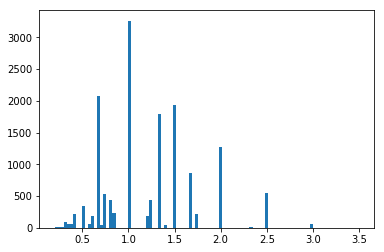

In [74]:
plt.hist(df['projects_over_time'], bins=100);

Let's look at a seaborn `pairplot` to see if we can sess out any relationships between variables.

In [77]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'dept_IT', 'dept_RandD',
       'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing',
       'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical',
       'projects_over_time'],
      dtype='object')

In [78]:
df_pp_vars = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'projects_over_time']

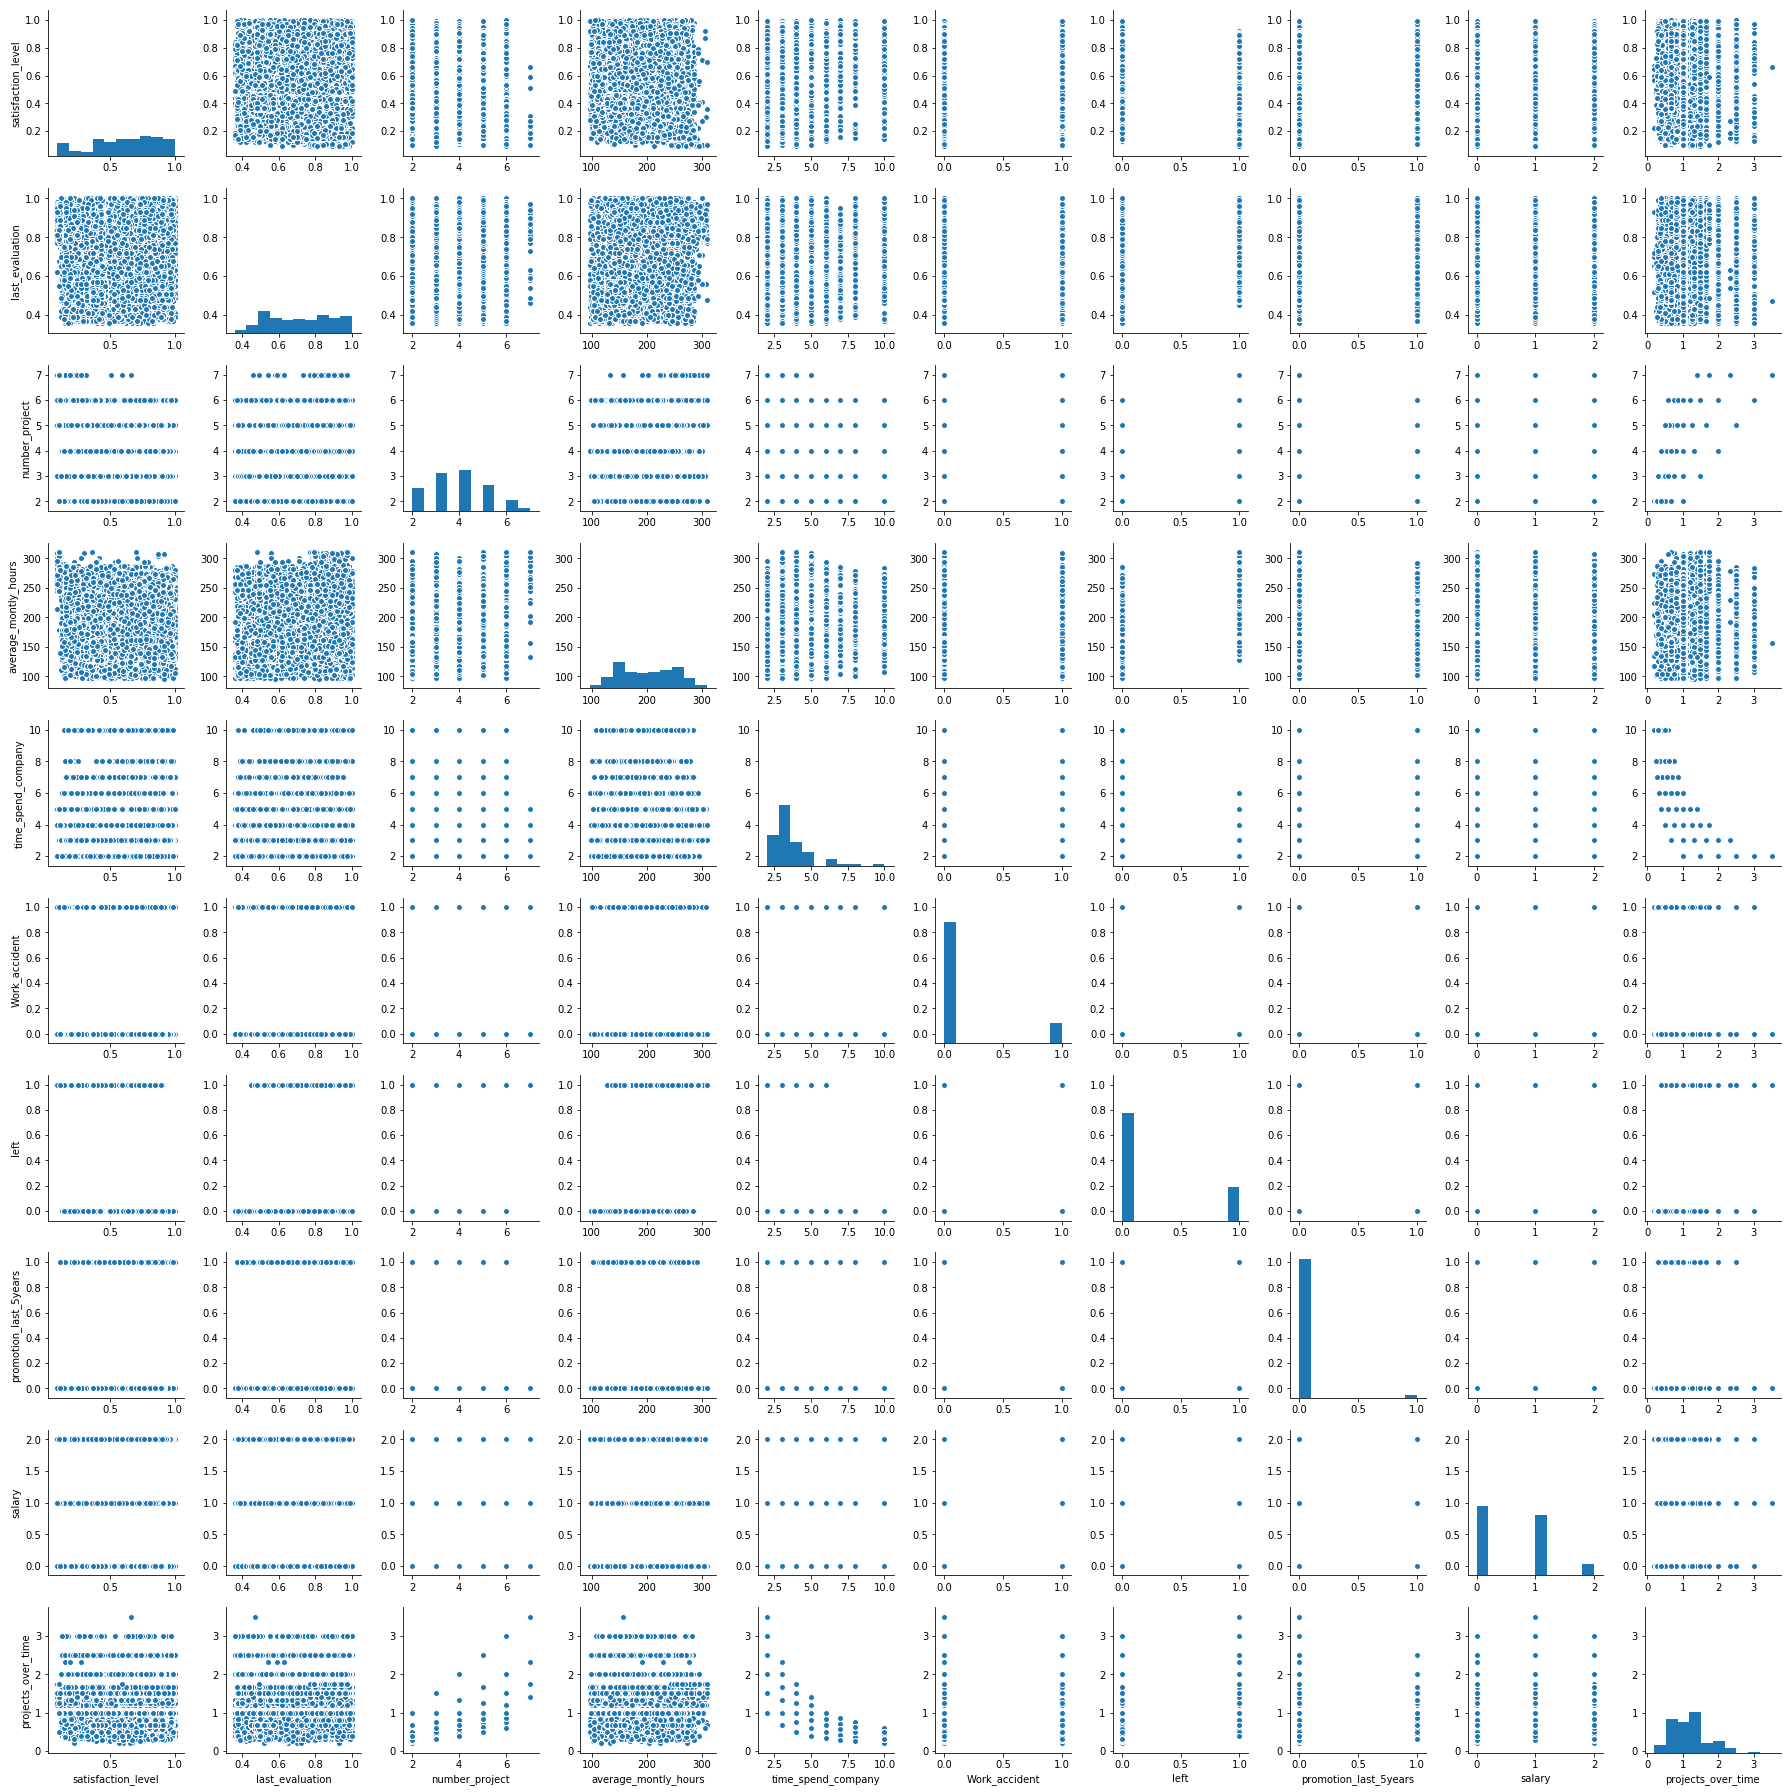

In [79]:
sns.pairplot(df[df_pp_vars])

I'm not seeing anything here.

Let's try other feature engineering: `salary` and `average_montly_hours` might have a meaningful relationship. Since we don't have actual salaries and just something like a salary tier (1,2,3), let's try multiplying the two.

In [82]:
df['approx_earned'] = df['salary']*df['average_montly_hours']

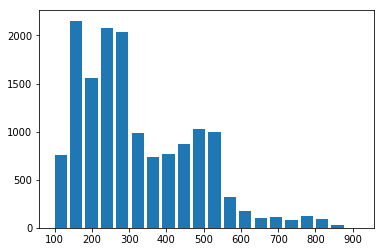

In [90]:
plt.hist(df['approx_earned'], bins=20, rwidth=0.8);

Let's also quickly correct that name `average_montly_hours` and `time_spend_company`...

In [83]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'dept_IT', 'dept_RandD',
       'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing',
       'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical',
       'projects_over_time', 'approx_earned'],
      dtype='object')

In [92]:
df.columns = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spent_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'dept_IT', 'dept_RandD',
       'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing',
       'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical',
       'projects_over_time', 'approx_earned']

Let's explore multiplying `satisfaction_level` and `time_spent_company`. My guess is a higher satisfaction at a longer time spent means more than a higher satisfaction at a short time spent.

In [93]:
df['satisfaction_ot'] = df['satisfaction_level']*df['time_spent_company']

(array([ 1233.,  1851.,  3436.,  2672.,  1923.,  1439.,   450.,   726.,
          530.,   221.,   170.,   124.,    52.,    52.,    30.,    32.,
            6.,    10.,    14.,    28.]),
 array([ 0.18 ,  0.666,  1.152,  1.638,  2.124,  2.61 ,  3.096,  3.582,
         4.068,  4.554,  5.04 ,  5.526,  6.012,  6.498,  6.984,  7.47 ,
         7.956,  8.442,  8.928,  9.414,  9.9  ]),
 <a list of 20 Patch objects>)

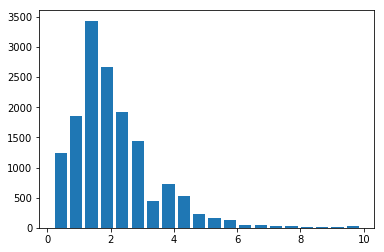

In [95]:
plt.hist(df['satisfaction_ot'], bins=20, rwidth=0.8)

I'm also thinking that there could be a way to shift the satisfaction level so that 0.5 = 0, and so we see disatisfaction as a negative value and satisfaction as a positive value. Then we could increase or decrease satisfaction more or less based on the time spent (for example: a 7 years employee satisfaction level of 0.7 means more than a 1 year employee satisfaction level of 0.7).

On that note, we can just make a simple binary (boolean) feature of `satisfied`, using the same 0.5 baseline as noted above:

In [100]:
df['satisfied'] = df['satisfaction_level'] > 0.5

In [101]:
df['satisfied'].value_counts()

True     10187
False     4812
Name: satisfied, dtype: int64

In [104]:
#pd.crosstab(df,['satisfied','left'])

left_satisfied = pd.crosstab(index=df["left"], 
                                columns=df["satisfied"])

left_satisfied.index = ["left","stayed"]

left_satisfied

satisfied,False,True
left,2262,9166
stayed,2550,1021
